### 통계적 수치

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline


matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

### 공분산

2개의 확률변수의 선형관계를 나타내는 값

상관이 있다면, 양의 공분산을 가진다.

- 두 변수의 관계를 수치적으로 나타내는 통계적 측정값
- 숫자가 높을 수록 강한 관계

### 표준 편차 ( std : standard deviation )

* 모집단 $\mathbf{x}$가 다음의 값을 갖는다고 하자: $\mathbf{x} = (x_1, x_2, \ldots, x_N)$

* 모집단의 평균, 분산, 표준편차는 다음과 같다:

$$\text{mean}({\bf{x}}) =\mu =\frac{\sum_{i=1}^{N}x_i}{N}$$
    
$$\text{var}({\bf{x}}) =\sigma^2 = \frac{\sum_{i=1}^{N}(x_i-\mu)^2}{N}$$
    
$$\text{std}({\bf{x}}) = \sigma = \sqrt{\sigma^2}$$


* 집단의 분산의 정도 또는 자료의 산포도를 나타내는 수치
* 표준편차가 작다는 것은 평균값에서 변량들의 거리가 가깝다는 의미
- 여기서 $N$  은 모집단의 전체 개수

- 표준 편차의 의미 : 데이터의 분포도
    - 작다 : 데이터가 몰려 있다.
    - 크다 : 데이터가 퍼져 있다.
- **Pandas 의 데이터프레임은 표본집단의 기준으로 계산한다 즉**
    - **$s$ = 표본집단의 표준편차 여기서 $n$ 은 표본 집단 안의 표본 수<br>$s = \sqrt{\frac{\Sigma_{i=1}^n (\bar{X}- X_i)^2}{n-1}}$**

- std 값 계산하여 비교해보기 (아래와 같이 n-1을 해야 pandas 계산 값 이랑 같아진다.)

- 분산을 $n-1$로 나누는 이유
    * 표본집단($X$)을 통해서 모집단의 평균($\mu$)과 분산($\sigma^2$)을 추정하고 싶다. 
    * 즉, 표본집단의 평균($\bar{X}$)과 분산($S^2$)의 기대값이 모집단의 평균, 분산과 같도록 하고 싶다. 
    * 수식으로 설명하자면
        * 평균 $\mu$, 분산이 $\sigma^2$인 모집단에서 $n$개의 샘플을 독립 항등 분포가 되도록 표본집단($X$)을 추출했다고 가정하자. 
        * 그러면 $E(\bar{X}) = \mu$, $E(S^2) = \sigma^2$임을 증명하면 충분하다.
        * 그런데 $E(S^2) = \sigma^2$는 $S^2 = \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{X})^2$일 때 성립한다. 
        * 따라서 표본집단의 분산을 계산할 때는 $n-1$로 나눠준다. 

In [5]:
data = {
    "math" :    [89,76,72,95],
    "english" : [76,75,89,76], 
    "science" : [95,90,79,88],
}

df = pd.DataFrame(data=data, index=["ha","heo","na","park"])
df["math"].std() #10.801234497346433

frac_upper = ((df["math"] - df["math"].mean()) ** 2).sum()
frac_lower = df["math"].__len__() - 1 # 여기에서 n-1을 해줘야 같아진다. <--

std_calced = np.sqrt(frac_upper/frac_lower)

np.sqrt(frac_upper/frac_lower) #10.801234497346433

10.801234497346433

In [6]:
df = pd.DataFrame(data = data, index=["Ha", "Heo", "Na", "Park"])
df

math  english  science
Ha      89       76       95
Heo     76       75       90
Na      72       89       79
Park    95       76       88

### Correlation

- 두 변수의 상관관계를 수치화 한 것
- 범위는 -1 에서 1 사이의 값
- 종류:
    - Pearson : Numerical 데이터 일 때
    - Spearman : Numerical, Categorical, Ordinal 데이터 일 때
    - 등 등…

- Pearson 상관계수

    - 두 데이터의 선형 관계를 파악한다.
    - **이상치에 민감하다.**
    - 상관 계수 :<br>$r_{xy} = \frac{Cov(x,y)}{ \sigma_x \sigma_y}$ <br> $\sigma$ 는 각 집단의 표준 편차
        - 공분산<br>$\text{Cov}(x,y) = \Sigma_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})$<br>여기서 $\bar{x}$, $\bar{y}$ 는 각 표본 집단의 평균

    - pearson  상관계수 구해보고, 히트 맵 이미지로 뽑아보기

- **피어슨 상관계수**
    * 두 수치 데이터의 공분산을 각각의 표준편차로 나눈 것
    * 공분산: 두 수치 데이터의 선형관계를 수치화하여 알려주는 값
    
    
    두 수치 데이터 $\mathbf{x} = (x_1, x_2, \ldots, x_n)$, $\mathbf{y} = (y_1, y_2, \ldots, y_n)$에 대해서 Pearson 상관계수를 다음과 같이 정의한다:
    
    \begin{align*}
    r_{\mathbf{x}\mathbf{y}} &= 
    \frac{\text{Cov}(\mathbf{x},\mathbf{y})}{\sigma_{\mathbf{x}}\sigma_{\mathbf{y}}}\\
    & = \frac{\sum_{i=1}^n(x_i-\overline{\mathbf{x}})(y_i-\overline{\mathbf{y}})}{\sqrt{\sum_{i=1}^n(x_i-\overline{\mathbf{x}})^2}\sqrt{{\sum_{i=1}^n(y_i-\overline{\mathbf{y}})^2}}}.
    \end{align*}
    여기서
    \begin{equation*}
    \overline{\mathbf{x}} = \frac{\sum_{i=1}^nx_i}{n},
    \end{equation*}
    
    \begin{equation*}
    \overline{\mathbf{y}} = \frac{\sum_{i=1}^ny_i}{n}
    \end{equation*}
    이다.
    
    **피어슨 상관계수의 해석**
    
    ![피어슨 상관계수의 해석](https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/600px-Correlation_coefficient.png)
    
    **피어슨 상관계수는 기울기를 반영한 것이 아니다!**
    
    ![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/600px-Correlation_examples2.svg.png)

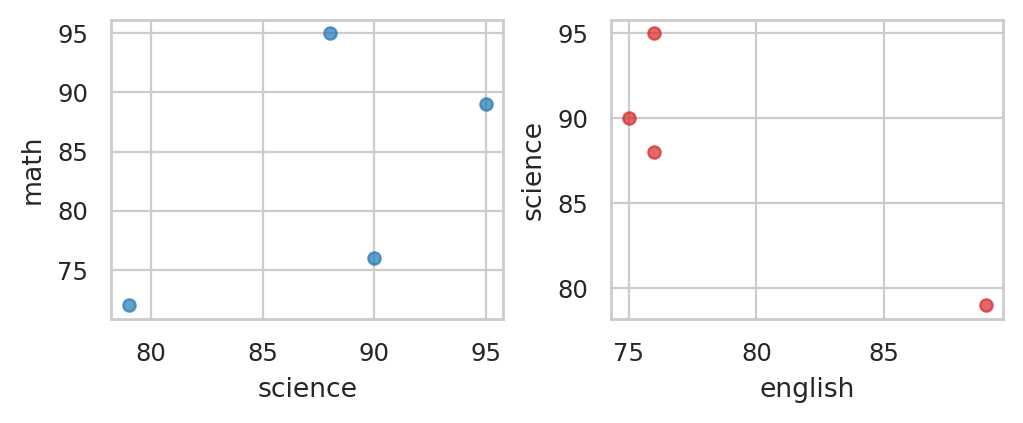

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,2))

df.plot(kind="scatter",
       x = "science",
       y = "math",
       color = "tab:blue",
       alpha = 0.7,
       ax = ax1);

df.plot(kind="scatter",
       x = "english",
       y = "science",
       color = "tab:red",
       alpha = 0.7,
       ax = ax2);

두 수치 데이터 $\mathbf{x} = (x_1, x_2, \ldots, x_n)$, $\mathbf{y} = (y_1, y_2, \ldots, y_n)$에 대해서 Pearson 상관계수를 다음과 같이 정의한다:

\begin{align*}
r_{\mathbf{x}\mathbf{y}} &= 
\frac{\text{Cov}(\mathbf{x},\mathbf{y})}{\sigma_{\mathbf{x}}\sigma_{\mathbf{y}}}\\
& = \frac{\sum_{i=1}^n(x_i-\overline{\mathbf{x}})(y_i-\overline{\mathbf{y}})}{\sqrt{\sum_{i=1}^n(x_i-\overline{\mathbf{x}})^2}\sqrt{{\sum_{i=1}^n(y_i-\overline{\mathbf{y}})^2}}}.
\end{align*}
여기서
\begin{equation*}
\overline{\mathbf{x}} = \frac{\sum_{i=1}^nx_i}{n},
\end{equation*}

\begin{equation*}
\overline{\mathbf{y}} = \frac{\sum_{i=1}^ny_i}{n}
\end{equation*}
이다.

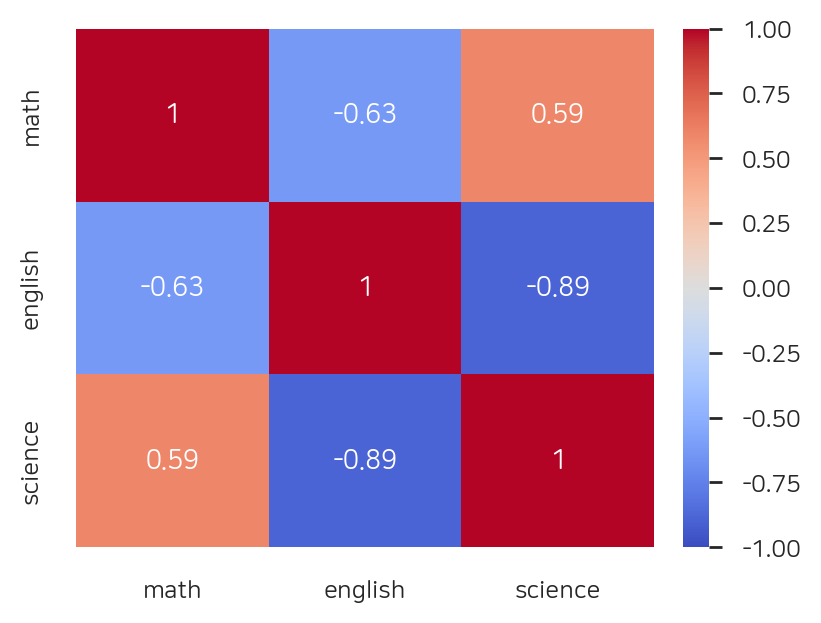

In [7]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
sns.heatmap(data=df.corr(method="pearson"),
            annot=True,
            vmax=1, vmin=-1,
            cmap="coolwarm",
            ax=ax);

In [23]:
## 수학과 과학의 Pearson's correlation을 계산하시오.

# 수학평균
math_mean = np.sum(df["math"])/len(df)

#수학 표준편차
math_std = np.sqrt(np.sum((df["math"] - math_mean)**2))


# 과학평균
science_mean = np.sum(df["science"])/len(df)

# 과학 표준편차
science_std = np.sqrt(np.sum((df["science"] - science_mean)**2))

# 공분산
cov = np.sum((df["math"] - math_mean)*(df["science"] - science_mean))

print("수학과 과학 과목의 상관계수 직접 계산한 값: ", cov/(math_std*science_std))
print("pandas가 계산한 값: ", df.corr().loc["math"]["science"])

수학과 과학 과목의 상관계수 직접 계산한 값:  0.5864315126053049
pandas가 계산한 값:  0.5864315126053049


- **상관계수는 기울기를 반영한 것은 아님!**

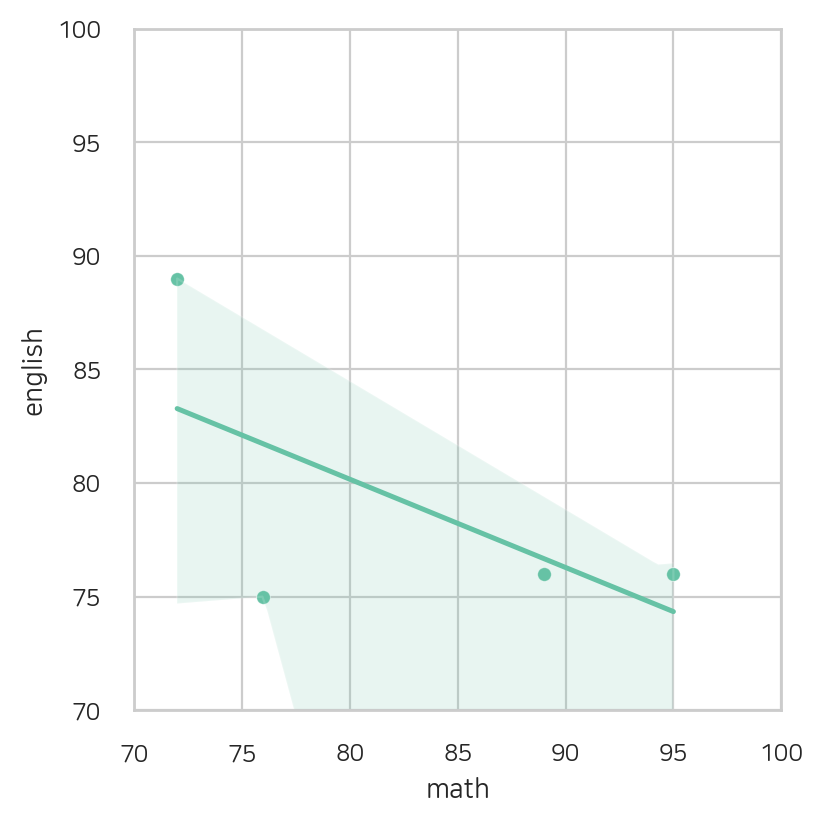

In [8]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
sns.scatterplot(data=df,
                x="math",
                y="english",ax=ax)
sns.regplot(data=df, # 회귀선 그리기
            x="math",
            y="english",
            ax=ax)

ax.set(xlim=[70,100], ylim=[70,100]);

**스피어만 상관계수**

* 두 데이터 사이의 순위(rank)에 대한 상관 계수
* numerical이나 ordinal 데이터에 대한 상관 관계를 분석할 수 있다.
* 스피어만 상관계수의 해석은 피어슨 상관계수와 같다.
* 스피어만 상관 계수는 피어슨 상관 계수에 비해 이상치에 덜 민감하다.

두 수치 데이터 $\mathbf{x} = (x_1, x_2, \ldots, x_n)$, $\mathbf{y} = (y_1, y_2, \ldots, y_n)$에 대해서 $R(x_i)$를 $\mathbf{x}$에서 $x_i$의 순서, $R(y_i)$를 $\mathbf{y}$에서 $y_i$의 순서라고 하자.

Spearman 상관계수를 다음과 같이 정의한다:

\begin{align*}
r_{R(\mathbf{x})R(\mathbf{y})} &= 
\frac{\text{Cov}(R(\mathbf{x}),R(\mathbf{y}))}{\sigma_{R(\mathbf{x})}\sigma_{R(\mathbf{x})}}
\end{align*}
만약 데이터의 순서가 단조증가라면 다음과 같이 계산할 수 있다:
$$
r_{R(\mathbf{x})R(\mathbf{y})} = 1-\frac{6\cdot\sum_{i=1}^nd_i^2}{n(n^2-1)}.
$$
여기서
$d_i = R(x_i) - R(y_i)$이다.

- Spearman 상관계수를 구해보고, 히트 맵 으로 뽑아보기

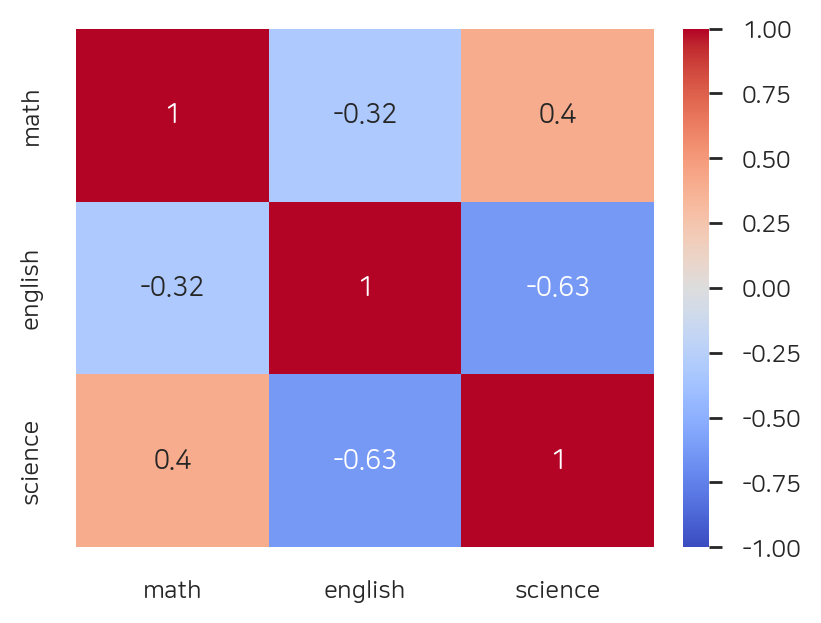

In [9]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
sns.heatmap(data=df.corr(method="spearman"),
            annot=True,
            vmax=1, vmin=-1,
            cmap="coolwarm",
            ax=ax);